## Cats vs Dogs Classification using DL

#### Imports:

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import cv2
import shutil
from shutil import copyfile
import random

import keras
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator # from keras.preprocessing.image import ImageDataGenerator is deprecated
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, MaxPooling2D, BatchNormalization, Activation, Dropout, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### Plot history:

In [16]:
# function to plote training history
def plot_history(history):
    # store results
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # plot results
    # accuracy
    plt.figure(figsize=(5, 8))
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.grid'] = True
    plt.rcParams['figure.facecolor'] = 'white'
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy: {str(round(acc[-1],3))}\nValidation Accuracy: {str(round(val_acc[-1],3))}')
    
    # loss
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.title(f'Training and Validation Loss. \nTrain Loss: {str(round(loss[-1],3))}\nValidation Loss: {str(round(val_loss[-1],3))}')
    plt.xlabel('epoch')
    plt.tight_layout(pad=3.0)
    plt.show()

#### Setting up the data:

In [9]:
train_dir = '/kaggle/input/cat-and-dog/training_set/training_set'
test_dir = '/kaggle/input/cat-and-dog/test_set/test_set'

In [10]:
#use generators
#resize image
train_ds = keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory=test_dir,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [11]:
def process(image, label):
    image = tf.cast(image/255,tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

#### Approach 1: CNN

In [18]:
# Model Definition
INPUT_SHAPE = (256, 256, 3)

model = keras.Sequential()

model.add(Conv2D(32, (3, 3), input_shape = INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))


In [19]:
model.compile(loss='binary_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 activation_6 (Activation)   (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                  

In [22]:
history = model.fit(train_ds,
                  batch_size = 32,
                  verbose=1,
                  epochs=20,
                  validation_data=validation_ds,
                  shuffle=False)

Epoch 1/20
251/251 [==============================] - 24s 93ms/step - loss: 0.6593 - accuracy: 0.6176 - val_loss: 0.6429 - val_accuracy: 0.6223
Epoch 2/20
251/251 [==============================] - 28s 109ms/step - loss: 0.6054 - accuracy: 0.6751 - val_loss: 0.6149 - val_accuracy: 0.6802
Epoch 3/20
251/251 [==============================] - 26s 103ms/step - loss: 0.5436 - accuracy: 0.7278 - val_loss: 0.5894 - val_accuracy: 0.6980
Epoch 4/20
251/251 [==============================] - 24s 92ms/step - loss: 0.4714 - accuracy: 0.7715 - val_loss: 0.5967 - val_accuracy: 0.6970
Epoch 5/20
251/251 [==============================] - 21s 84ms/step - loss: 0.4032 - accuracy: 0.8149 - val_loss: 0.6057 - val_accuracy: 0.7222
Epoch 6/20
251/251 [==============================] - 22s 86ms/step - loss: 0.3262 - accuracy: 0.8522 - val_loss: 0.6427 - val_accuracy: 0.7291
Epoch 7/20
251/251 [==============================] - 20s 77ms/step - loss: 0.2714 - accuracy: 0.8773 - val_loss: 0.7468 - val_accurac

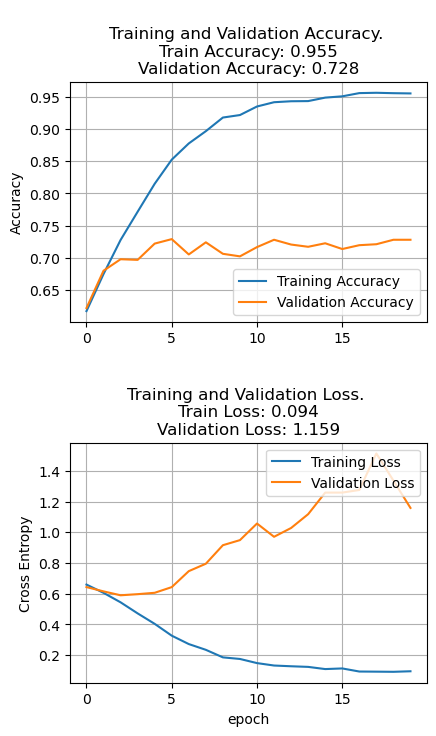

In [24]:
plot_history(history)

In [36]:
_, acc = model.evaluate(validation_ds)
print("Accuracy: ", (acc*100.0), " %")

64/64 [==============================] - 5s 64ms/step - loss: 1.1590 - accuracy: 0.7281
Accuracy:  72.81265258789062  %


#### Approach 2: VGG16

In [40]:
# Load the pre-trained VGG19 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False
# Add custom classification layers on top of the pre-trained model
last_output = base_model.output
x = tf.keras.layers.Flatten()(last_output)  # Flatten the output layer to 1 dimension
x = tf.keras.layers.Dense(1024, activation='relu')(x)   # Add a fully connected layer with 1024 hidden units and ReLU activation
x = tf.keras.layers.Dropout(0.6)(x) # Add dropout for regularization
predictions = Dense(1, activation='sigmoid')(x)  # 2 classes: cat and dog

58889256/58889256 [==============================] - 0s 0us/step


In [41]:
# Create the final model
vgg16_model = Model(inputs=base_model.input, outputs=predictions)

In [42]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [43]:
vgg16_model.compile(optimizer = tf.keras.optimizers.legacy.Adam(),
            loss = 'binary_crossentropy',
            metrics=['accuracy'])

In [44]:
# Train the model
history = vgg16_model.fit(train_ds,
                       epochs=20,
                       validation_data=validation_ds,
                       verbose=1)

Epoch 1/20
251/251 [==============================] - 43s 153ms/step - loss: 0.6550 - accuracy: 0.8470 - val_loss: 0.2130 - val_accuracy: 0.9170
Epoch 2/20
251/251 [==============================] - 35s 135ms/step - loss: 0.2047 - accuracy: 0.9133 - val_loss: 0.3870 - val_accuracy: 0.8191
Epoch 3/20
251/251 [==============================] - 33s 131ms/step - loss: 0.1965 - accuracy: 0.9171 - val_loss: 0.1797 - val_accuracy: 0.9288
Epoch 4/20
251/251 [==============================] - 35s 136ms/step - loss: 0.1767 - accuracy: 0.9255 - val_loss: 0.1787 - val_accuracy: 0.9244
Epoch 5/20
251/251 [==============================] - 32s 126ms/step - loss: 0.1521 - accuracy: 0.9398 - val_loss: 0.1863 - val_accuracy: 0.9199
Epoch 6/20
251/251 [==============================] - 35s 136ms/step - loss: 0.1511 - accuracy: 0.9359 - val_loss: 0.1757 - val_accuracy: 0.9273
Epoch 7/20
251/251 [==============================] - 37s 145ms/step - loss: 0.1356 - accuracy: 0.9448 - val_loss: 0.1762 - val_ac

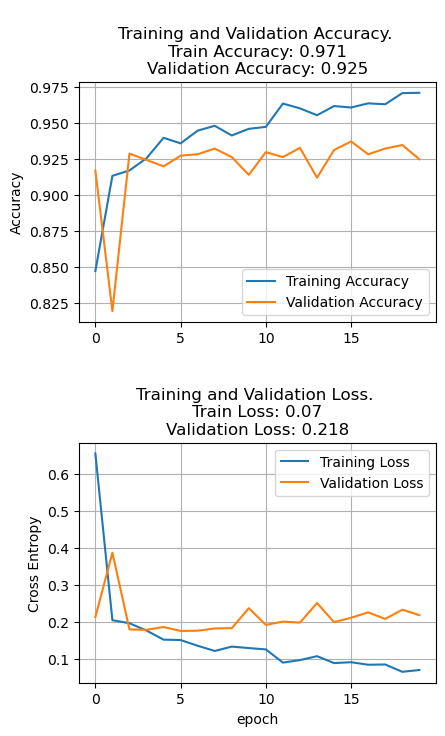

In [45]:
plot_history(history)

#### Approach 3: ResNet50

In [47]:
# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False
# Add custom classification layers on top of the pre-trained model
last_output = base_model.output 
x = tf.keras.layers.Flatten()(last_output)  # Flatten the output layer to 1 dimension
x = tf.keras.layers.Dense(1024, activation='relu')(x)   # Add a fully connected layer with 1024 hidden units and ReLU activation
x = tf.keras.layers.Dropout(0.6)(x) # Add dropout for regularization
predictions = Dense(1, activation='sigmoid')(x)  # 2 classes: cats and dogs

94765736/94765736 [==============================] - 0s 0us/step


In [48]:
# create the final model
resnet50_model = Model(inputs=base_model.input, outputs=predictions)
resnet50_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [49]:
resnet50_model.compile(optimizer = tf.keras.optimizers.legacy.Adam(),
            loss = 'binary_crossentropy',
            metrics=['accuracy'])

In [50]:
# Train the model
resnet50_history = model.fit(train_ds,
                       epochs=20,
                       validation_data=validation_ds,
                       verbose=1)

Epoch 1/20
251/251 [==============================] - 22s 85ms/step - loss: 0.0833 - accuracy: 0.9625 - val_loss: 1.2101 - val_accuracy: 0.7375
Epoch 2/20
251/251 [==============================] - 21s 84ms/step - loss: 0.0787 - accuracy: 0.9630 - val_loss: 1.3387 - val_accuracy: 0.7350
Epoch 3/20
251/251 [==============================] - 21s 82ms/step - loss: 0.0726 - accuracy: 0.9651 - val_loss: 1.4835 - val_accuracy: 0.7276
Epoch 4/20
251/251 [==============================] - 20s 79ms/step - loss: 0.0770 - accuracy: 0.9618 - val_loss: 1.4523 - val_accuracy: 0.7430
Epoch 5/20
251/251 [==============================] - 22s 86ms/step - loss: 0.0687 - accuracy: 0.9665 - val_loss: 1.6033 - val_accuracy: 0.7469
Epoch 6/20
251/251 [==============================] - 22s 86ms/step - loss: 0.0800 - accuracy: 0.9603 - val_loss: 1.6730 - val_accuracy: 0.7286
Epoch 7/20
251/251 [==============================] - 23s 88ms/step - loss: 0.0763 - accuracy: 0.9619 - val_loss: 1.5083 - val_accuracy:

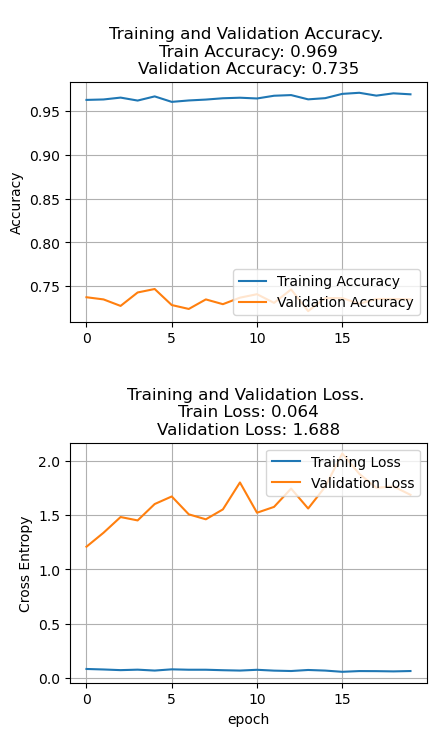

In [52]:
plot_history(resnet50_history)